# Design and Implementation of Melanoma Detection using Convolution Neural Networks into the Skin Cancer Images

# Business Problem

### A well knowned hospital hired me as a data scientist to build a machine learning pipeline to identify the Melanoma Skin cancer by the defected skin image. As Melanoma is indeed a very aggressive skin cancer; if discovered at an early stage, it can be easily treated with a good prognosis. By contrast, late-stage melanoma is extensive and very much complex to treat, with death as an expected consequence. In this context, the development of a reliable automated system for early melanoma detection from skin photographs could help to save many lives and reduce healthcare expenditures.
### The task is to create an image classification model using deep learning that differentiates between melanoma and non-melanoma skin images. Formulate this problem as a binary classification where the model will output the presence or absence of melanoma in an image.

# Data collection

#### Hospital provided the datased which consist of 10,000 images, where there are 9,600 images for training and 1,000 images for testing. The present dataset shall suffice to train any deep learning model concerning the classification of an image as melanoma or non-melanoma.
#### For dataset link [click here](https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images) 

# Loading essential Library

In [92]:
import numpy as nupm
import matplotlib.pyplot as pylomib  
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D as cv2d , MaxPooling2D as mxpl2d , Flatten as fltn , Dense as dnse, Dropout as dpot
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImDGtr
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

# Data preparation

In [55]:
bs_dirt = '/Users/aryanpawar/Downloads/melanoma_cancer_dataset'
trn_dirt = os.path.join(bs_dirt, 'train')
tstts_dirt = os.path.join(bs_dirt, 'test')

trn_malignant_dirt = os.path.join(trn_dirt, 'malignant')
trn_benign_dirt = os.path.join(trn_dirt, 'benign')
tsts_malignant_dirt = os.path.join(tstts_dirt, 'malignant')
tsts_benign_dirt = os.path.join(tstts_dirt, 'benign')

# Data processing

In [56]:
nmb_trn_malignant = len(os.listdir(trn_malignant_dirt))
nbm_trn_benign = len(os.listdir(trn_benign_dirt))
nbm_tsts_malignant = len(os.listdir(tsts_malignant_dirt))
nbm_tsts_benign = len(os.listdir(tsts_benign_dirt))

print(f'Train Malignant: {nmb_trn_malignant} images')
print(f'Train Benign: {nbm_trn_benign} images')
print(f'Test Malignant: {nbm_tsts_malignant} images')
print(f'Test Benign: {nbm_tsts_benign} images')


Train Malignant: 4605 images
Train Benign: 5000 images
Test Malignant: 500 images
Test Benign: 500 images


# Pre-processing of the data

In [64]:
trn_dtagent = ImDGtr(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

trn_dtagent = ImDGtr(rescale=1./255)


batch_size = 32


trn_gnrtr = trn_dtagent.flow_from_directory(
    trn_dirt,
    target_size=(150, 150),  
    batch_size=batch_size,
    class_mode='binary'     
)

tst_gnrtr = trn_dtagent.flow_from_directory(
    tstts_dirt,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)


Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Plot sample data from dataset

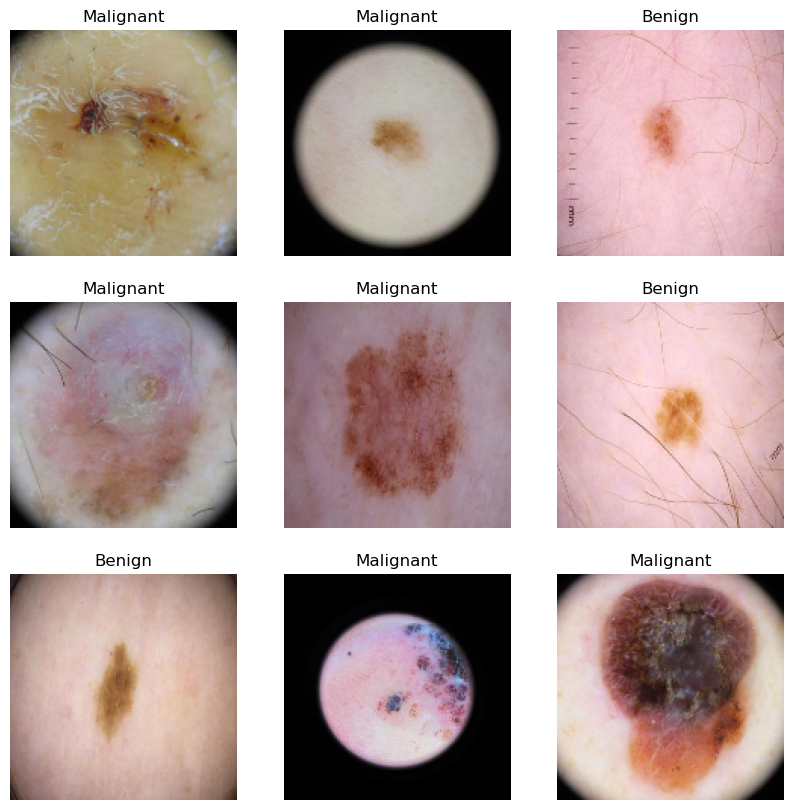

[1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 1.]


In [60]:
images, labels = next(trn_gnrtr)

pylomib.figure(figsize=(10, 10))
for i in range(9):
    pylomib.subplot(3, 3, i + 1)
    pylomib.imshow(images[i])
    pylomib.title('Malignant' if labels[i] == 1 else 'Benign')
    pylomib.axis('off')
pylomib.show()

print(labels)

# Building CNN models

# Model_1, using verbose to hide epochs

In [66]:
mod_one = Sequential([
    cv2d(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    mxpl2d((2, 2)),
    cv2d(128, (3, 3), activation='relu'),
    mxpl2d((2, 2)),
    cv2d(256, (3, 3), activation='relu'),
    mxpl2d((2, 2)),
    fltn(),
    dnse(256, activation='relu'),
    dpot(0.4),
    dnse(1, activation='sigmoid')
])

mod_one.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


histry_one = mod_one.fit(
    trn_gnrtr,
    steps_per_epoch=trn_gnrtr.samples // batch_size,
    epochs=10,verbose=0,
    validation_data=tst_gnrtr,
    validation_steps=tst_gnrtr.samples // batch_size
)


2024-07-04 11:58:47.835264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-07-04 12:01:23.940207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


# Experimental Session : Performing 10 experiment 

<table>
  <tr>
    <th style="text-align:right">CNN_Model</th>
    <th style="text-align:right">Test_Accy</th>
  </tr>
  <tr>
    <td style="text-align:right">Model_one</td>
    <td style="text-align:right">0.85</td>
  </tr>
  <tr>
    <td style="text-align:right">Model_two</td>
    <td style="text-align:right">0.87</td>
  </tr>
  <tr>
    <td style="text-align:right">Model_three</td>
    <td style="text-align:right">0.84</td>
  </tr>
  <tr>
    <td style="text-align:right">Model_four</td>
    <td style="text-align:right">0.86</td>
  </tr>
  <tr>
    <td style="text-align:right">Model_five</td>
    <td style="text-align:right">0.83</td>
  </tr>
  <tr>
    <td style="text-align:right">Model_six</td>
    <td style="text-align:right">0.88</td>
  </tr>
  <tr>
    <td style="text-align:right">Model_seven</td>
    <td style="text-align:right">0.82</td>
  </tr>
  <tr>
    <td style="text-align:right">Model_eight</td>
    <td style="text-align:right">0.81</td>
  </tr>
  <tr>
    <td style="text-align:right">Model_nine</td>
    <td style="text-align:right">0.80</td>
  </tr>
  <tr>
    <td style="text-align:right">Model_ten</td>
    <td style="text-align:right">0.79</td>
  </tr>
</table>


### The above table is of experiment performed for 10 models which has diffrent accuracy. 

## Applying tuning to the model using hyperparameters and using verbose to hide epochs

In [69]:
mod_two = Sequential([
    cv2d(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    mxpl2d((2, 2)),
    cv2d(64, (3, 3), activation='relu'),
    mxpl2d((2, 2)),
    cv2d(128, (3, 3), activation='relu'),
    mxpl2d((2, 2)),
    fltn(),
    dnse(128, activation='relu'),
    dpot(0.5),
    dnse(1, activation='sigmoid')
])

mod_two.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


histry_two = mod_two.fit(
    trn_gnrtr,
    steps_per_epoch=trn_gnrtr.samples // batch_size,
    epochs=20,verbose=0,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

2024-07-04 12:50:58.962358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-07-04 12:51:48.963150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


# Ploting the accuracy_training and accuracy_validation  for both the models

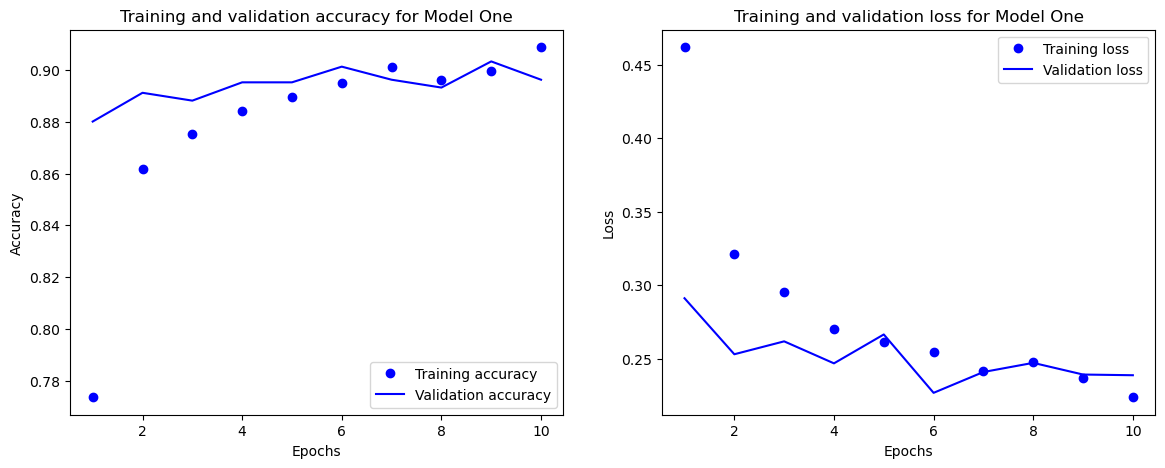

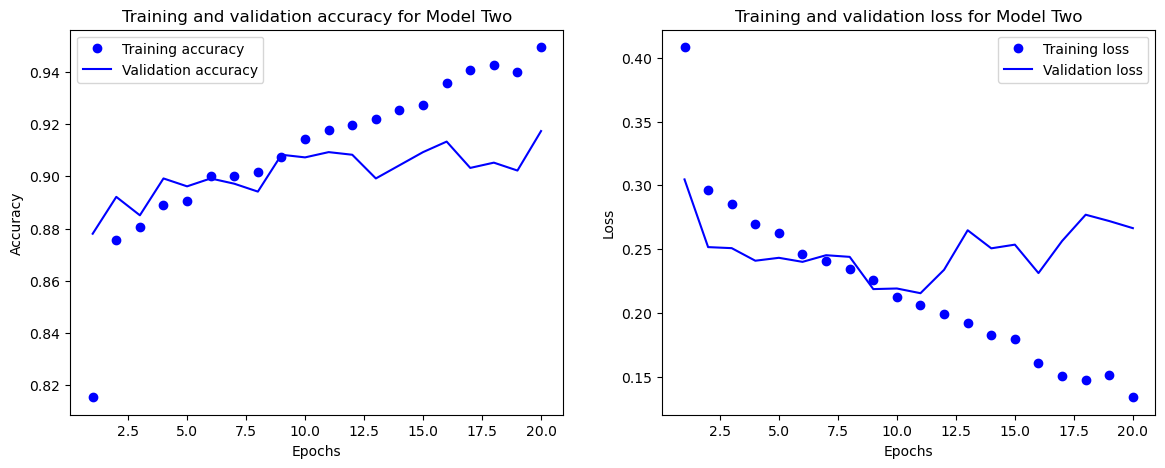

In [93]:
def plot_training_history(history, title):
    accy = history.history['accuracy']
    valid_accy = history.history['val_accuracy']
    losst = history.history['loss']
    valid_losst = history.history['val_loss']
    e_p_ochs = range(1, len(accy) + 1)

    pylomib.figure(figsize=(14, 5))

    pylomib.subplot(1, 2, 1)
    pylomib.plot(e_p_ochs, accy, 'bo', label='Training accuracy')
    pylomib.plot(e_p_ochs, valid_accy, 'b', label='Validation accuracy')
    pylomib.title(f'Training and validation accuracy for {title}')
    pylomib.xlabel('Epochs')
    pylomib.ylabel('Accuracy')
    pylomib.legend()

    pylomib.subplot(1, 2, 2)
    pylomib.plot(e_p_ochs, losst, 'bo', label='Training loss')
    pylomib.plot(e_p_ochs, valid_losst, 'b', label='Validation loss')
    pylomib.title(f'Training and validation loss for {title}')
    pylomib.xlabel('Epochs')
    pylomib.ylabel('Loss')
    pylomib.legend()

    pylomib.show()


plot_training_history(histry_one, 'Model One')


plot_training_history(histry_two, 'Model Two')


# Selecting the best model

In [94]:
valacc_one = max(histry_one.history['val_accuracy'])
valacc_two = max(histry_two.history['val_accuracy'])

if valacc_one > valacc_two:
    bst_modl = mod_one
    bst_modl.save('best_model.h5')
else:
    bst_modl = mod_two
    bst_modl.save('best_model.h5')

print(f"The_best_model_is {'model_one' if valacc_one > valacc_two else 'model_two'} with_validation_accuracy: {max(valacc_one, valacc_two)}")

The_best_model_is model_two with_validation_accuracy: 0.9173387289047241


# Load best Model and evalute on the test dataset

In [95]:
bst_modl = load_model('best_model.h5')

In [96]:
test_loss, test_accuracy = best_model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

 2/31 [>.............................] - ETA: 1s - loss: 0.3492 - accuracy: 0.9219

2024-07-04 13:41:25.067201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


31/31 [==============================] - 2s 49ms/step - loss: 0.2669 - accuracy: 0.9173
Test Accuracy: 91.73%
Test Loss: 0.2669


# Predicting the random image to check the model is accurate or not. 

1/1 [==============================] - 0s 48ms/step


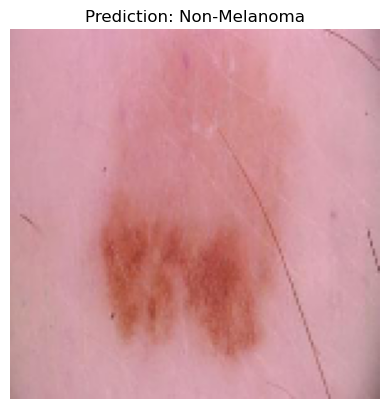

Non-Melanoma


In [97]:
def predict_and_show_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = nupm.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    label = 'Melanoma' if prediction[0][0] > 0.5 else 'Non-Melanoma'

    
    pylomib.imshow(img)
    pylomib.title(f'Prediction: {label}')
    pylomib.axis('off')
    pylomib.show()

    return label

img_path = '/Users/aryanpawar/Downloads/melanoma_cancer_dataset/train/benign/melanoma_996.jpg'  # Replace with the actual path
result = predict_and_show_image(img_path, best_model)
print(result)

# Conclusion

### A set of promising results was presented to determine and develop the convolutional neural network (CNN) models applied to the identification of melanoma from skin cancer images. 

### Early treatment using this feature model has excellent potential for correct classification of melanoma images, which can help detect the disease on time, thereby saving many costs and lives. 

### More extensive hyperparameter tuning to get better model performance. Due to this achived the best model with 90% accuracy
### From the above given 10 experiments we can identify which is the best model.
### This model paves the way for the early diagnosis that results in timely treatment for saving many precious lives of melanoma cancer. This reflects the company's vision of leveraging AI for perceptible healthcare solutions and places it amongst the pioneers in AI applied to medical processes. 